<a href="https://colab.research.google.com/github/TenofJiwon/Python/blob/main/CNN_smiling_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
ls

non_smile/  smile/


Text(0.5, 1.0, 'Smile')

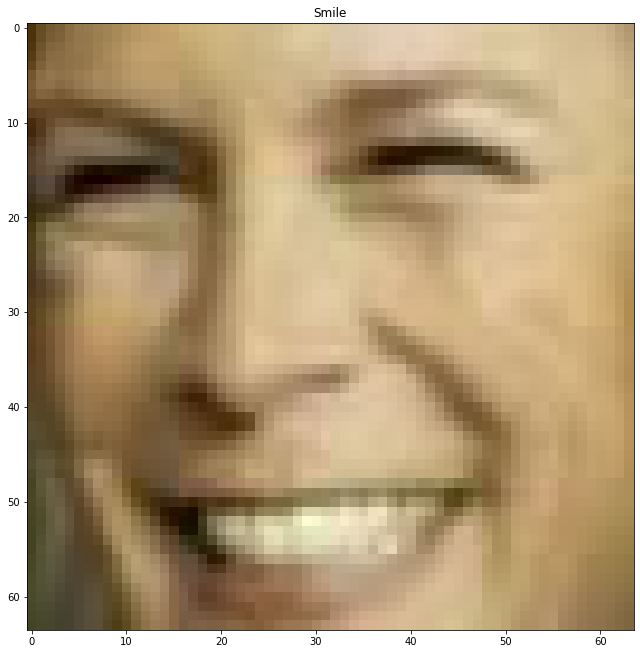

In [ ]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('/content/drive/MyDrive/data/smile/Jamie_Lee_Curtis_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('Smile')

Text(0.5, 1.0, 'Non_Smile')

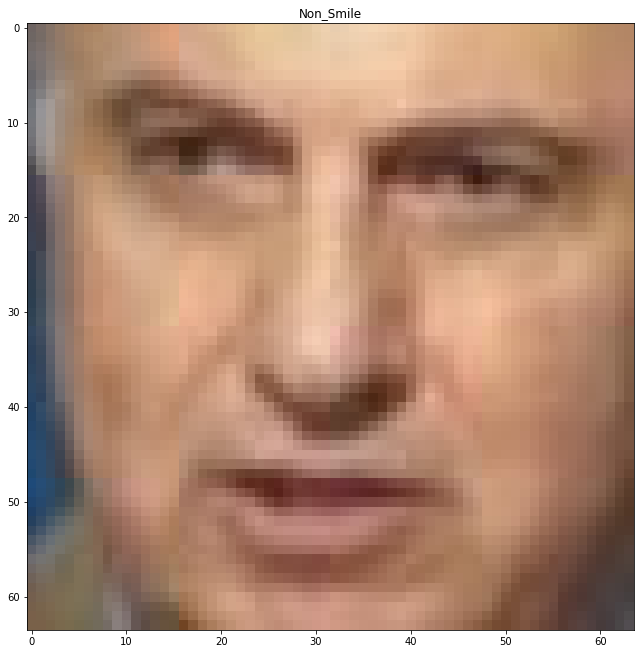

In [ ]:
image_sample2= imread('/content/drive/MyDrive/data/non_smile/Ahmed_Chalabi_0003.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample2, ax=ax)
ax.set_title('Non_Smile')

In [ ]:
image_sample2.shape

(64, 64, 3)

In [ ]:
cd /

/


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

train_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        shear_range=0.2,
        zoom_range=0.2, 
        horizontal_flip=True,   
    )

train = train_gen.flow_from_directory(directory='../content/drive/MyDrive/data',
                                              target_size=(64, 64),
                                              color_mode='rgb',
                                              class_mode='binary', 
                                              batch_size=20,
                                              shuffle=True)

model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4), input_shape=(64, 64, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,  activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.fit_generator(train, epochs=4)

Found 1203 images belonging to 2 classes.


<ipython-input-12-affd88646e30>:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train, epochs=4)


Epoch 1/4
61/61 [==============================] - 20s 322ms/step - loss: 1.4309 - accuracy: 0.5320
Epoch 2/4
61/61 [==============================] - 14s 225ms/step - loss: 0.6627 - accuracy: 0.6351
Epoch 3/4
61/61 [==============================] - 14s 224ms/step - loss: 0.6683 - accuracy: 0.5927
Epoch 4/4
61/61 [==============================] - 15s 252ms/step - loss: 0.6481 - accuracy: 0.6334
